In [1]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv ("Desktop/metis_shtuff/dataacquisition.csv")
df = df.drop("Unnamed: 0", 1)

In [3]:
df.head()
#TARanking will be our target

,RestaurantName,Review,TARanking,NameLength,Avg$PerPax,NumOfReviews,Photos,ZipCode,Claimed,Michelin,TravellersChoice,ReserveOnTA
0,The Courtyard,4.5,1,13,4.0,1420,863,49178.0,True,False,True,True
1,Entre-Nous creperie,5.0,2,19,2.5,1479,486,188383.0,True,False,True,False
2,Portman's Bar,5.0,3,13,4.0,248,272,39594.0,True,False,False,False
3,Paulaner Bräuhaus Singapore,4.5,4,27,2.5,1036,473,39596.0,True,False,True,True
4,Grand Shanghai Restaurant,5.0,5,25,2.5,619,533,169662.0,True,False,True,False


In [4]:
#drop outliers/impossible data
df = df.drop([972,973,975,1003])
df = df.drop([1022])
df = df.drop([831,955,1001])
df = df.drop([182,15,79,187,201,239,443,465])
df = df.drop(['RestaurantName'], axis = 1)
df = df.dropna()
df.head()

,Review,TARanking,NameLength,Avg$PerPax,NumOfReviews,Photos,ZipCode,Claimed,Michelin,TravellersChoice,ReserveOnTA
0,4.5,1,13,4.0,1420,863,49178.0,True,False,True,True
1,5.0,2,19,2.5,1479,486,188383.0,True,False,True,False
2,5.0,3,13,4.0,248,272,39594.0,True,False,False,False
3,4.5,4,27,2.5,1036,473,39596.0,True,False,True,True
4,5.0,5,25,2.5,619,533,169662.0,True,False,True,False


In [6]:
train, test = train_test_split(df, test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


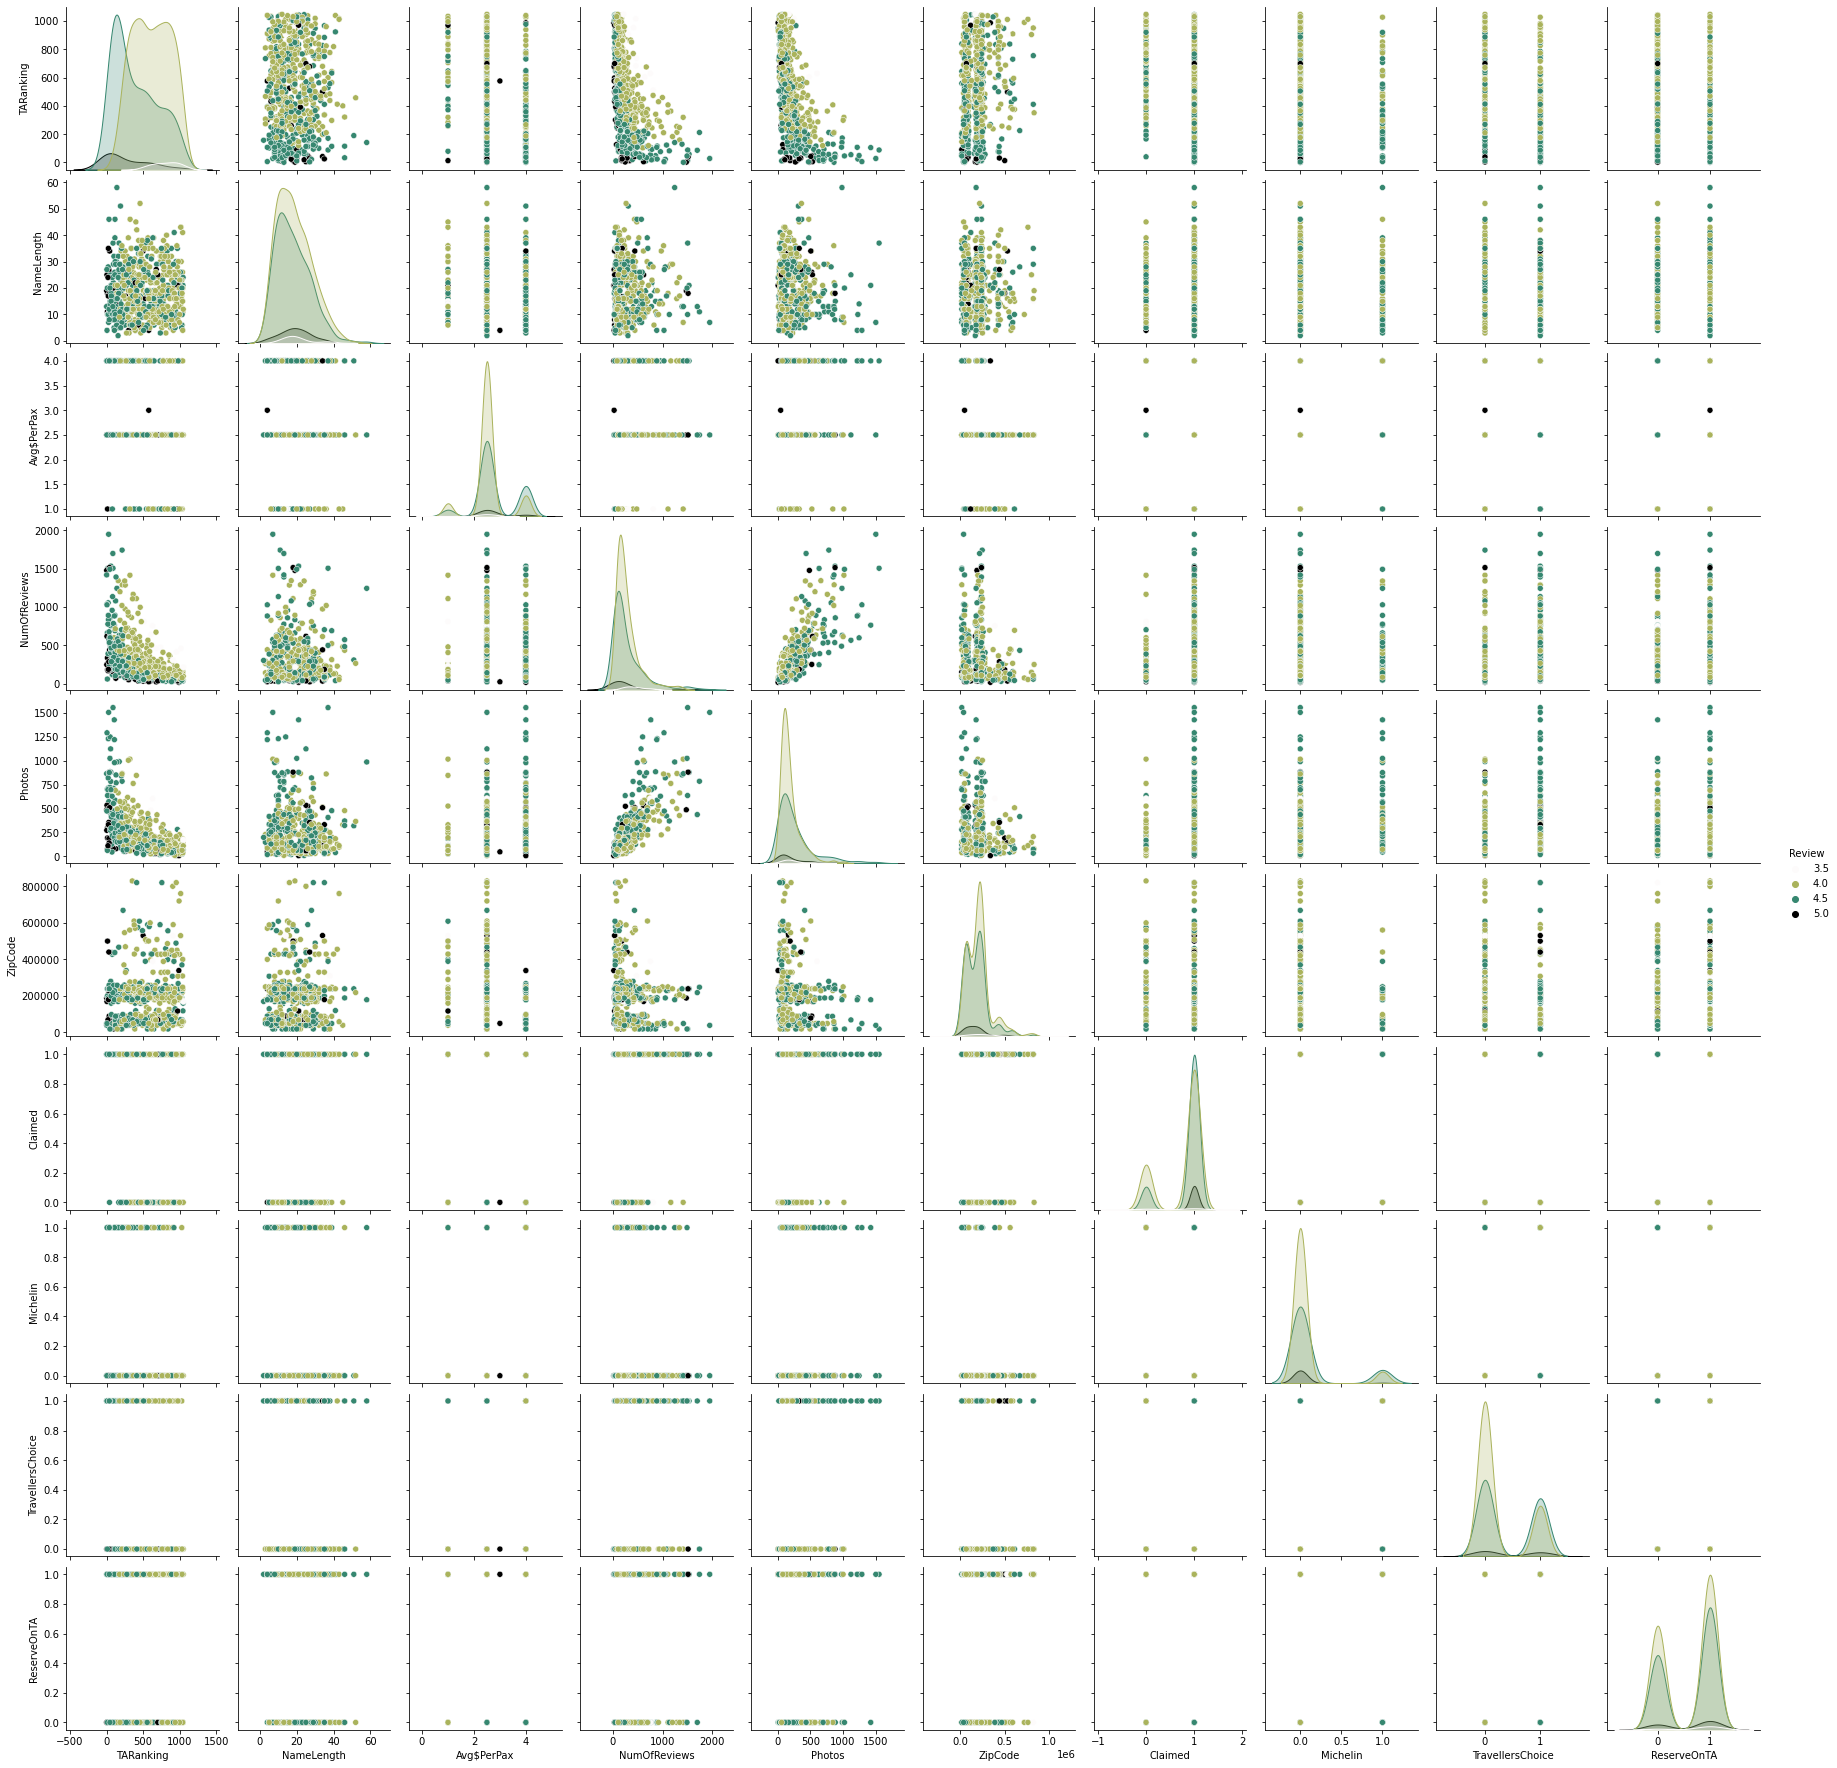

In [7]:
sns.pairplot(train, hue = "Review", palette = "gist_earth_r")

In [8]:
# slice data into features and target
X = df.drop(columns = ["TARanking"]).astype(float) 
X = sm.add_constant(X)
y = df.loc[:, "TARanking"].astype(float) 

# fit model with target
model = sm.OLS(y, X, data = df) 

# fit our model 
results = model.fit()
 
# summarize our model 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              TARanking   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     127.8
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          1.07e-169
Time:                        19:50:02   Log-Likelihood:                -6621.4
No. Observations:                 986   AIC:                         1.326e+04
Df Residuals:                     975   BIC:                         1.332e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2199.7547     95.635     23.002      0.000    2012.081    2387.429
Review            -330.9845     21.773    -15.201      0.000    -373.713    -288.256
NameLength          -0.5574      0.699     -0.798      0.425      -1.928       0.813
Avg$PerPax          -9.3321     10.215     -0.914      0.361     -29.378      10.714
NumOfReviews        -0.3914      0.038    -10.412      0.000      -0.465      -0.318
Photos              -0.1582      0.050     -3.172      0.002      -0.256      -0.060
ZipCode           7.696e-05   4.67e-05      1.649      0.100   -1.46e-05       0.000
Claimed            -42.0182     18.176     -2.312      0.021     -77.686      -6.350
Michelin           -40.6209     22.958     -1.769      0.077     -85.674       4.432
TravellersChoice  -134.3220     15.753     -8.527      0.000    -165.235    -103.409
ReserveOnTA        -42.3175     14.459     -2.927      0.004     -70.692     -13.943
==============================================================================
Omnibus:                       19.421   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.773
Skew:                           0.175   Prob(JB):                      0.00102
Kurtosis:                       2.538   Cond. No.                     3.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#drop features with not statistically significant p values
new_df = df.drop(['NameLength','Avg$PerPax','ZipCode','Michelin'], axis = 1)

In [10]:
# slice data into features and target
X = new_df.drop(columns = ["TARanking"]).astype(float) 
X = sm.add_constant(X)
y = new_df.loc[:, "TARanking"].astype(float) 

# fit model with target
model = sm.OLS(y, X, data = new_df) 

# fit our model 
results = model.fit()
 
# summarize our model 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              TARanking   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     210.5
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          2.78e-172
Time:                        19:50:02   Log-Likelihood:                -6626.0
No. Observations:                 986   AIC:                         1.327e+04
Df Residuals:                     979   BIC:                         1.330e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2197.8525     91.650     23.981      0.000    2017.999    2377.706
Review            -333.8428     21.760    -15.342      0.000    -376.545    -291.141
NumOfReviews        -0.3754      0.037    -10.134      0.000      -0.448      -0.303
Photos              -0.2014      0.047     -4.258      0.000      -0.294      -0.109
Claimed            -46.8712     17.864     -2.624      0.009     -81.927     -11.816
TravellersChoice  -134.8732     15.731     -8.574      0.000    -165.743    -104.004
ReserveOnTA        -43.8395     14.440     -3.036      0.002     -72.176     -15.502
==============================================================================
Omnibus:                       22.074   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.062
Skew:                           0.206   Prob(JB):                     0.000325
Kurtosis:                       2.530   Cond. No.                     7.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

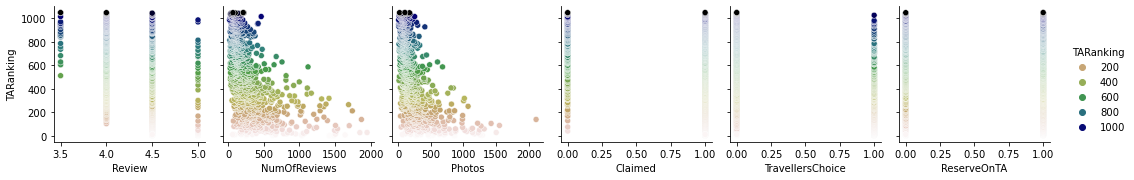

In [11]:
pp = sns.pairplot(data=new_df,
                  y_vars=['TARanking'],
                  x_vars=['Review', 'NumOfReviews', 'Photos','Claimed','TravellersChoice','ReserveOnTA'],
                  hue = "TARanking", palette = "gist_earth_r")
#i see correlation in my numerical features, but also heteroskedascity, so planning to take log of these two features

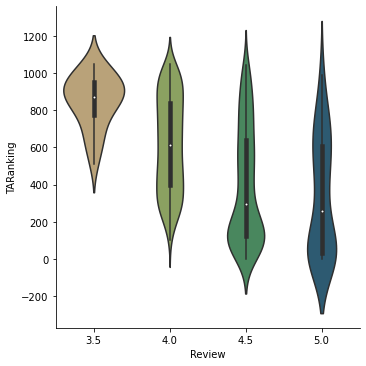

In [12]:
#plotting violinplots of categorical features to back up regression model
reviewplot = sns.catplot(x="Review", y="TARanking", kind="violin", data=new_df, palette = "gist_earth_r")

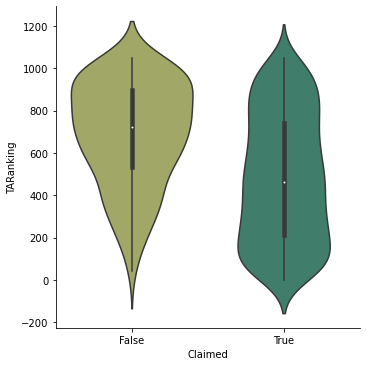

In [13]:
claimedplot = sns.catplot(x="Claimed", y="TARanking", kind="violin", data=new_df, palette = "gist_earth_r")

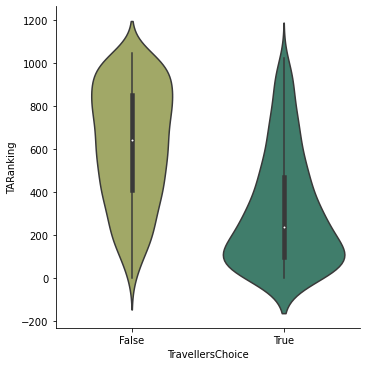

In [14]:
tchoiceplot = sns.catplot(x="TravellersChoice", y="TARanking", kind="violin", data=new_df, palette = "gist_earth_r")

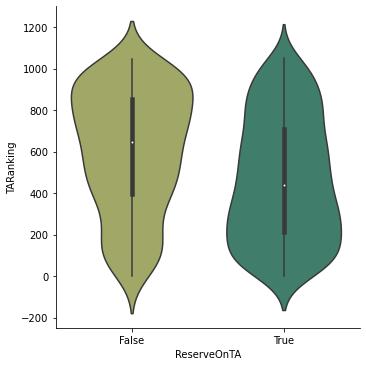

In [15]:
reserveplot = sns.catplot(x="ReserveOnTA", y="TARanking", kind="violin", data=new_df, palette = "gist_earth_r")

Text(0.5, 0, 'Prediction')

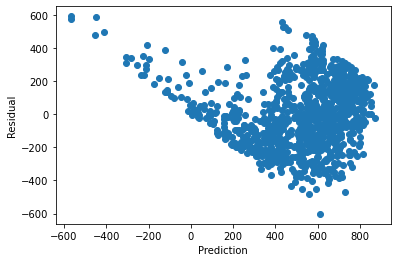

In [16]:
# Plot residuals vs. predictions
# heteroskedascity very apparent
fig = plt.scatter(results.predict(), results.resid)
fig.axes.set_ylabel('Residual')
fig.axes.set_xlabel('Prediction')

In [29]:
# slice data into features and target
# taking log of NumOfReviews and Photos features
X = new_df.drop(columns = ["TARanking"]).astype(float)
X["NumOfReviews"] = np.log(new_df['NumOfReviews'])
X["Photos"] = np.log(new_df['Photos'])
X = sm.add_constant(X)
y = new_df.loc[:, "TARanking"].astype(float) 

# fit model with target
model2 = sm.OLS(y, X, data = new_df) 

# fit our model 
results2 = model2.fit()
 
# summarize our model 
results2.summary()

#here I realize that I should take -X, since it makes sense to associate positive coefficients with positive ranking (as in lower ranking)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              TARanking   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     476.1
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          3.32e-286
Time:                        20:20:06   Log-Likelihood:                -6361.2
No. Observations:                 986   AIC:                         1.274e+04
Df Residuals:                     979   BIC:                         1.277e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3924.4376     85.930     45.670      0.000    3755.809    4093.066
Review            -485.5249     17.551    -27.664      0.000    -519.966    -451.084
NumOfReviews      -208.0302      9.675    -21.501      0.000    -227.017    -189.043
Photos             -38.3170      9.585     -3.997      0.000     -57.127     -19.507
Claimed            -17.0866     13.700     -1.247      0.213     -43.971       9.797
TravellersChoice   -82.6081     12.139     -6.805      0.000    -106.430     -58.786
ReserveOnTA        -30.2103     11.028     -2.740      0.006     -51.851      -8.570
==============================================================================
Omnibus:                        0.865   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.860
Skew:                          -0.072   Prob(JB):                        0.651
Kurtosis:                       2.988   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# slice data into features and target
# taking log of NumOfReviews and Photos features
X = new_df.drop(columns = ["TARanking"]).astype(float)
X["NumOfReviews"] = np.log(new_df['NumOfReviews'])
X["Photos"] = np.log(new_df['Photos'])
X = -X
X = sm.add_constant(X)
y = new_df.loc[:, "TARanking"].astype(float) 

# fit model with target
model2 = sm.OLS(y, X, data = new_df) 

# fit our model 
results2 = model2.fit()
 
# summarize our model 
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              TARanking   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     476.1
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          3.32e-286
Time:                        20:21:04   Log-Likelihood:                -6361.2
No. Observations:                 986   AIC:                         1.274e+04
Df Residuals:                     979   BIC:                         1.277e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3924.4376     85.930     45.670      0.000    3755.809    4093.066
Review             485.5249     17.551     27.664      0.000     451.084     519.966
NumOfReviews       208.0302      9.675     21.501      0.000     189.043     227.017
Photos              38.3170      9.585      3.997      0.000      19.507      57.127
Claimed             17.0866     13.700      1.247      0.213      -9.797      43.971
TravellersChoice    82.6081     12.139      6.805      0.000      58.786     106.430
ReserveOnTA         30.2103     11.028      2.740      0.006       8.570      51.851
==============================================================================
Omnibus:                        0.865   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.860
Skew:                          -0.072   Prob(JB):                        0.651
Kurtosis:                       2.988   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Prediction')

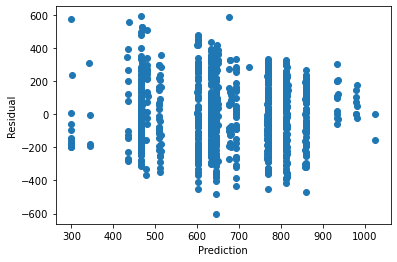

In [33]:
# Plot residuals vs. predictions
fig = plt.scatter(results.predict(), results.resid)
fig.axes.set_ylabel('Residual')
fig.axes.set_xlabel('Prediction')

# looking much better!!